Transfer Learning :
It is a Deep Learning technique where we use a pre-trained model.This pre-trained model is trained for one task and can be re-trained for a similar task with smaller dataset.

When you train a model from Scratch but on smaller dataset you will not achieve high accuracy thus we here using Transfer learning

Transfer Learning gives higher accuracy compared to training models from scratch.

Ex. if you trained a model on image recognisation of face mask but you can use this for dog cat classification too

Examples of Pre-Trained Models(used for image detection):


*   VGG-16
*   ResNet50
*   Inceptionv3
*   MobileNet V2 (light weight)

Workflow :      
Dataset --> Image Preprocessing --> Train Test Split --> Pretrained MobileNet Model

New Image --> MobileNet model trained on dog vs cat data --> Output



In [ ]:
#install the kaggle library
!pip install kaggle

In [ ]:
#configure the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
#Kaggle API
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:09<00:00, 93.2MB/s]
100% 812M/812M [00:09<00:00, 90.9MB/s]


In [ ]:
#extracting the compressed files
from zipfile import ZipFile
dataset = "dogs-vs-cats.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [ ]:
#extracting the compressed files
from zipfile import ZipFile
dataset2 = "/content/train.zip"

with ZipFile(dataset2, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [ ]:
import os

#counting the number of files in train folder

path , dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print('Number of Images : ', file_count)


Number of Images :  25000


Printing the names of images

In [ ]:
file_names = os.listdir("/content/train")
print(file_names)

['cat.6435.jpg', 'cat.1938.jpg', 'dog.8965.jpg', 'cat.1979.jpg', 'cat.4442.jpg', 'dog.3333.jpg', 'cat.11539.jpg', 'cat.7346.jpg', 'cat.9806.jpg', 'cat.1542.jpg', 'dog.706.jpg', 'dog.11469.jpg', 'cat.7279.jpg', 'dog.4874.jpg', 'dog.1295.jpg', 'dog.11527.jpg', 'cat.382.jpg', 'cat.12447.jpg', 'cat.12108.jpg', 'dog.8221.jpg', 'dog.6015.jpg', 'dog.9544.jpg', 'dog.4448.jpg', 'dog.3086.jpg', 'cat.12145.jpg', 'dog.9763.jpg', 'cat.7725.jpg', 'dog.1224.jpg', 'dog.5870.jpg', 'cat.5296.jpg', 'dog.5204.jpg', 'cat.7630.jpg', 'dog.9744.jpg', 'cat.6114.jpg', 'cat.376.jpg', 'cat.9376.jpg', 'cat.872.jpg', 'cat.3666.jpg', 'cat.3588.jpg', 'cat.8040.jpg', 'cat.11391.jpg', 'cat.7813.jpg', 'dog.1983.jpg', 'cat.311.jpg', 'dog.7802.jpg', 'dog.4825.jpg', 'dog.10680.jpg', 'dog.206.jpg', 'dog.9846.jpg', 'cat.7126.jpg', 'cat.11809.jpg', 'cat.10434.jpg', 'dog.672.jpg', 'cat.6522.jpg', 'dog.5717.jpg', 'dog.9948.jpg', 'cat.7647.jpg', 'dog.6262.jpg', 'cat.10670.jpg', 'dog.5766.jpg', 'dog.10128.jpg', 'dog.1587.jpg', 'd

Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image

Displaying the Images of Dogs and Cats

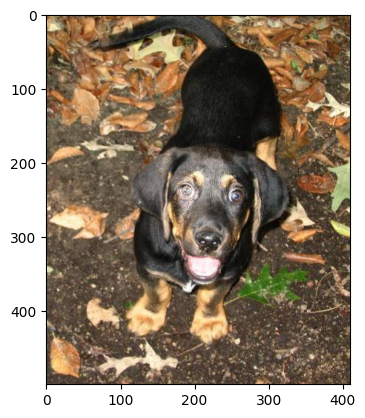

In [ ]:
#display dog imges
img = mpimg.imread("/content/train/dog.6432.jpg")
imgplot = plt.imshow(img)

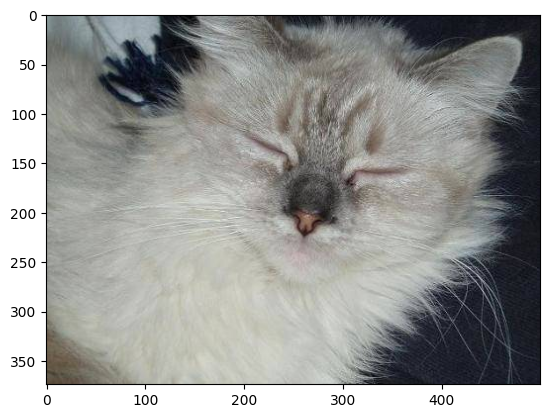

In [ ]:
#display cat imges
img = mpimg.imread("/content/train/cat.400.jpg")
imgplot = plt.imshow(img)

In [ ]:
#number of dogs and cats images
file_name = os.listdir("/content/train")
dog_count = 0
cat_count = 0
for name in file_name:
  if name.startswith("dog"):
    dog_count += 1
  else:
    cat_count += 1
print("Number of Dogs : ", dog_count)
print("Number of Cats : ", cat_count)

Number of Dogs :  12500
Number of Cats :  12500


In [ ]:
file_names = os.listdir("/content/train")

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
cat
dog
cat
cat


In [ ]:
file_names = os.listdir("/content/train")

Dog_Count = 0
Cat_Count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == "dog":
    Dog_Count += 1
  else:
    Cat_Count += 1

print("Number of Dogs : ", Dog_Count)
print("Number of Cats : ", Cat_Count)

Number of Dogs :  12500
Number of Cats :  12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/resized_images')

In [ ]:
original_folder = "/content/train"
resized_folder = "/content/resized_images"

In [ ]:
for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder + "/" + filename
  img = Image.open(img_path)
  img = img.resize((224,224))  #mobilenet needs 224,224
  img = img.convert('RGB')
  img.save(resized_folder + "/" + filename)

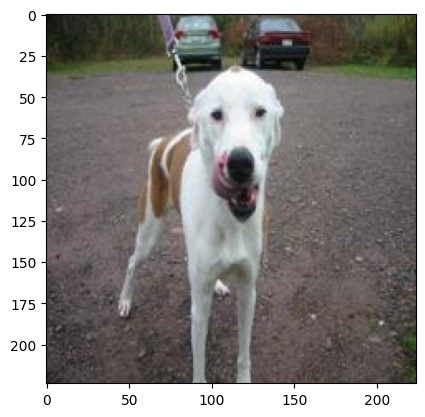

In [ ]:
#display resized dog imges
img = mpimg.imread("/content/resized_images/dog.8965.jpg")
imgplot = plt.imshow(img)

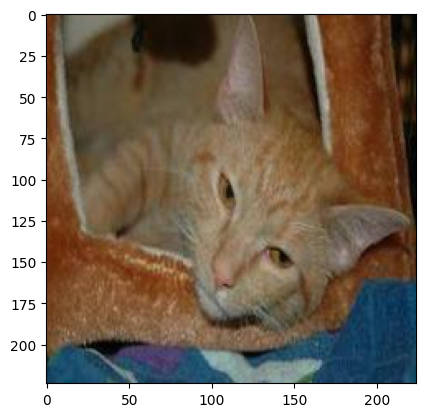

In [ ]:
#display cat imges
img = mpimg.imread("/content/resized_images/cat.6435.jpg")
imgplot = plt.imshow(img)

Creating Labels for resized images of dogs & cats

Dogs -->  0

Cats -->  1

In [ ]:
#creating a for loop to assign lables
file_names = os.listdir("/content/resized_images")

labels = []

for i in range(2000):
  filename = file_names[i]
  if filename.startswith("dog"):
    labels.append(0)
  else:
    labels.append(1)

In [ ]:
print(file_names)

['cat.6435.jpg', 'cat.1938.jpg', 'dog.8965.jpg', 'cat.1979.jpg', 'cat.4442.jpg', 'dog.3333.jpg', 'cat.11539.jpg', 'cat.7346.jpg', 'cat.9806.jpg', 'cat.1542.jpg', 'dog.706.jpg', 'dog.11469.jpg', 'cat.7279.jpg', 'dog.4874.jpg', 'dog.1295.jpg', 'dog.11527.jpg', 'cat.382.jpg', 'cat.12447.jpg', 'cat.12108.jpg', 'dog.8221.jpg', 'dog.6015.jpg', 'dog.9544.jpg', 'dog.4448.jpg', 'dog.3086.jpg', 'cat.12145.jpg', 'dog.9763.jpg', 'cat.7725.jpg', 'dog.1224.jpg', 'dog.5870.jpg', 'cat.5296.jpg', 'dog.5204.jpg', 'cat.7630.jpg', 'dog.9744.jpg', 'cat.6114.jpg', 'cat.376.jpg', 'cat.9376.jpg', 'cat.872.jpg', 'cat.3666.jpg', 'cat.3588.jpg', 'cat.8040.jpg', 'cat.11391.jpg', 'cat.7813.jpg', 'dog.1983.jpg', 'cat.311.jpg', 'dog.7802.jpg', 'dog.4825.jpg', 'dog.10680.jpg', 'dog.206.jpg', 'dog.9846.jpg', 'cat.7126.jpg', 'cat.11809.jpg', 'cat.10434.jpg', 'dog.672.jpg', 'cat.6522.jpg', 'dog.5717.jpg', 'dog.9948.jpg', 'cat.7647.jpg', 'dog.6262.jpg', 'cat.10670.jpg', 'dog.5766.jpg', 'dog.10128.jpg', 'dog.1587.jpg', 'd

In [ ]:
print(labels)

[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 

In [ ]:
print(len(file_names), len(labels))

2000 2000


In [ ]:
#counting the images of dogs and cats in resized images
values , counts = np.unique(labels, return_counts = True)
print(values, counts)

[0 1] [ 960 1040]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = "/content/resized_images"
image_list = glob.glob(image_directory + "/*.jpg")   # image_extension = ['png','jpg']

image_extensions = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + "/*." + ext)) for ext in image_extensions]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 40  77 133]
   [ 27  63 117]
   [ 16  50 103]
   ...
   [  5  12  15]
   [  3   8   6]
   [  1   5   0]]

  [[ 35  72 128]
   [ 25  61 115]
   [ 16  50 103]
   ...
   [  6  13  16]
   [  3   8   6]
   [  0   4   0]]

  [[ 29  64 120]
   [ 22  58 112]
   [ 18  52 105]
   ...
   [  6  13  16]
   [  3   8   6]
   [  0   4   0]]

  ...

  [[ 97  68  24]
   [ 97  68  23]
   [ 98  69  24]
   ...
   [104  78  24]
   [101  76  20]
   [ 97  72  16]]

  [[ 94  66  25]
   [ 94  67  23]
   [ 93  66  22]
   ...
   [107  81  27]
   [103  78  22]
   [ 98  74  16]]

  [[ 89  61  20]
   [ 89  61  20]
   [ 89  62  18]
   ...
   [108  83  27]
   [103  78  22]
   [ 99  75  17]]]


 [[[253 255 254]
   [250 253 251]
   [249 251 252]
   ...
   [249 252 250]
   [255 254 253]
   [255 255 254]]

  [[246 248 248]
   [241 243 243]
   [239 241 242]
   ...
   [236 239 237]
   [243 241 240]
   [252 250 249]]

  [[240 242 243]
   [233 235 236]
   [227 229 230]
   ...
   [220 222 222]
   [232 230 230]
   [249 247

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X_train.shape , X_test.shape , X.shape)

(1600, 224, 224, 3) (400, 224, 224, 3) (2000, 224, 224, 3)


1600 --> Training Data

400 --> Testing Data

In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.39215686 0.36078431 0.38823529]
   [0.39215686 0.36078431 0.38823529]
   [0.39607843 0.36470588 0.39215686]
   ...
   [0.91764706 0.84705882 0.80392157]
   [0.95294118 0.87843137 0.82745098]
   [0.97647059 0.90196078 0.85098039]]

  [[0.39215686 0.36078431 0.38823529]
   [0.39215686 0.36078431 0.38823529]
   [0.39215686 0.36078431 0.38823529]
   ...
   [0.92156863 0.85098039 0.80784314]
   [0.97254902 0.89803922 0.84705882]
   [1.         0.93333333 0.88235294]]

  [[0.38823529 0.35686275 0.38431373]
   [0.38823529 0.35686275 0.38431373]
   [0.39215686 0.36078431 0.38823529]
   ...
   [0.93333333 0.8627451  0.81960784]
   [0.99607843 0.92941176 0.87843137]
   [1.         0.97254902 0.92156863]]

  ...

  [[0.17254902 0.28235294 0.41568627]
   [0.17647059 0.28627451 0.41960784]
   [0.20392157 0.31372549 0.44705882]
   ...
   [0.25098039 0.27058824 0.32941176]
   [0.24313725 0.2627451  0.32156863]
   [0.23921569 0.25882353 0.31764706]]

  [[0.11764706 0.21960784 0.36078431]
   [0.1

Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_v2_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model = hub.KerasLayer(mobilenet_v2_model, input_shape = (224,224,3), trainable = False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"]
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs = 8)

Epoch 1/8
50/50 [==============================] - 79s 2s/step - loss: 0.2422 - accuracy: 0.9013
Epoch 2/8
50/50 [==============================] - 71s 1s/step - loss: 0.0877 - accuracy: 0.9712
Epoch 3/8
50/50 [==============================] - 69s 1s/step - loss: 0.0729 - accuracy: 0.9744
Epoch 4/8
50/50 [==============================] - 76s 2s/step - loss: 0.0573 - accuracy: 0.9825
Epoch 5/8
50/50 [==============================] - 72s 1s/step - loss: 0.0483 - accuracy: 0.9856
Epoch 6/8
50/50 [==============================] - 73s 1s/step - loss: 0.0389 - accuracy: 0.9906
Epoch 7/8
50/50 [==============================] - 72s 1s/step - loss: 0.0356 - accuracy: 0.9919
Epoch 8/8
50/50 [==============================] - 73s 1s/step - loss: 0.0309 - accuracy: 0.9944


In [ ]:
score ,accuracy = model.evaluate(X_test_scaled, Y_test)
print('test Loss : ', score)
print("Test Accuracy : ", accuracy)

13/13 [==============================] - 19s 1s/step - loss: 0.0420 - accuracy: 0.9850
test Loss :  0.04198388010263443
Test Accuracy :  0.9850000143051147


Building a Predictive System

In [ ]:
input_img_path = input('Path of the image to be predicted : ')
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)

input_img_resize = cv2.resize(input_img, (224,224))
input_img_scaled = input_img_resize/255

image_reshaped = np.reshape(input_img_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print("The image contains Dog")
else:
  print("The image contains Cat")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/path_to_save_model')

In [ ]:
# Save the model
model.save('dog_cat_model.h5')

In [ ]:
#print(f"Streamlit version: {st.__version__}")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pillow version: {PIL.__version__}")
print(f"TensorFlow version: {tf.__version__}")